# NetCDF data manipulation and visualisation with `xarray`

<b>Question</b>: How can I extract data, perform calculations and create quick plots in netCDF?

<b>Objectives</b>:

  1. Extract netcdf data into a variable
  
  2.  Perform arithmetic with xarray: Mean, Max, Sum
  
  3.  Plotting arithmetic of xarray dataset
  
  4.  Plot 1D, 2D and 3D datasets with xarray 
  
  5.  Slicing/subsetting xarray dataset: Longitude, Latitude, Time
  
  6.  Masking dataset with .where() function
  
  7.  Using the groupby function on xarray dataset

<b>What is Xarray?</b>

Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!

It is particularly tailored to working with netCDF files which are: numeric, multi-dimensional,    labelled, contains metadata and sometimes (very) large

The [xarray documentation](http://xarray.pydata.org/en/stable/index.html) is a great place to get started, and in particular the [documentation on plotting](http://xarray.pydata.org/en/stable/user-guide/plotting.html) will be very useful.

# Demonstration of `xarray` functionality we will be using

To begin our exercises on Xarray, python packages need to be imported

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path  # this module is useful for constructing paths
%matplotlib inline

In [2]:
# Change the path below to where you've 
data_path = Path("../data/")

In [3]:
# (1) Opening and extracting data into a variable

ds = xr.open_dataset(data_path / 'ERA5_temp_rh_West_Africa.nc')

# print content of ds
ds

<xarray.Dataset>
Dimensions:    (latitude: 77, level: 6, longitude: 153, time: 492)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2020-12-01T12:00:00
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sat May 22 17:00:08 2021: cdo selday,1 ERA5_temperature_rh_...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [4]:
# print dimensions use in the dataset
ds.dims

Frozen(SortedKeysDict({'time': 492, 'longitude': 153, 'latitude': 77, 'level': 6}))

In [5]:
# print attributes of the datasets
ds.attrs

{'CDI': 'Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg.de/cdi)',
 'Conventions': 'CF-1.6',
 'history': 'Sat May 22 17:00:08 2021: cdo selday,1 ERA5_temperature_rh_West_Africa.nc ERA5.nc\nSat May 22 16:46:41 2021: cdo selhour,12 ERA5_temperature_rh_West_Africa.nc ERA_extract3.nc\n2021-05-22 12:45:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data3/adaptor.mars.internal-1621682428.5499933-6242-23-8c660e77-6ed3-4eb1-b99d-6b5f86cf9550.nc /cache/tmp/8c660e77-6ed3-4eb1-b99d-6b5f86cf9550-adaptor.mars.internal-1621682428.550575-6242-6-tmp.grib',
 'CDO': 'Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg.de/cdo)'}

In [6]:
# select the temperature variable in the dataset
ds.t

<xarray.DataArray 't' (time: 492, level: 6, latitude: 77, longitude: 153)>
[34777512 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2020-12-01T12:00:00
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K

In [7]:
# print out the values of temperature in dataset
# (this will be the underlying numpy array, with the coordinate information stripped out)
ds.t.values

array([[[[262.42038, 262.39154, 262.37018, ..., 264.6173 , 264.66434,
          264.6558 ],
         [262.55716, 262.51978, 262.48557, ..., 264.81714, 264.84708,
          264.85455],
         [262.72064, 262.67792, 262.63516, ..., 264.91116, 264.97742,
          265.00735],
         ...,
         [267.14017, 267.33252, 267.4447 , ..., 267.3571 , 267.43295,
          267.50348],
         [267.2716 , 267.4864 , 267.62744, ..., 267.34106, 267.25024,
          267.2075 ],
         [267.32077, 267.54944, 267.69583, ..., 267.3261 , 267.11026,
          266.95212]],

        [[272.96378, 272.68274, 272.36432, ..., 271.42398, 271.45285,
          271.43893],
         [273.2683 , 273.04712, 272.77997, ..., 271.70822, 271.74777,
          271.8001 ],
         [273.44568, 273.295  , 273.0952 , ..., 272.00635, 272.07153,
          272.16022],
         ...,
         [274.43088, 274.29947, 273.98315, ..., 274.75467, 274.60828,
          274.61362],
         [274.46616, 274.30267, 273.99063, ..., 27

In [8]:
# select temperature variable through subsetting or slicing. First let's select temperature for a
# certain point location (6.66 N, 1.51 W), extracting at all pressure levels and timesteps. 

ds.t.sel(longitude=-1.51, latitude=6.66, method='nearest')

<xarray.DataArray 't' (time: 492, level: 6)>
array([[266.35266, 274.45547, 282.98462, 289.74   , 295.5636 , 301.35086],
       [266.76404, 275.8681 , 281.94064, 292.0502 , 297.01575, 302.71967],
       [268.48868, 274.19046, 281.28244, 291.68796, 296.59903, 302.44827],
       ...,
       [267.31647, 275.2772 , 282.67154, 289.93982, 293.69577, 299.51724],
       [268.41495, 276.20895, 282.34244, 292.88046, 296.67917, 302.39804],
       [266.99057, 275.67255, 283.63217, 291.6901 , 297.21344, 302.97827]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2020-12-01T12:00:00
    longitude  float32 -1.5
    latitude   float32 6.75
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K

In [9]:
# Use the slice function to subset across any coordinate of the dataset. For instance, select temperature
# between pressure levels 1000 to 700 only.

ds.t.sel(level=slice(850,1000))

<xarray.DataArray 't' (time: 492, level: 3, latitude: 77, longitude: 153)>
array([[[[286.99597, ..., 284.4667 ],
         ...,
         [289.31046, ..., 293.16364]],

        ...,

        [[290.40356, ..., 292.64966],
         ...,
         [297.44424, ..., 305.65714]]],


       ...,


       [[[286.7972 , ..., 283.77216],
         ...,
         [289.36493, ..., 295.0603 ]],

        ...,

        [[292.66354, ..., 294.87653],
         ...,
         [298.21466, ..., 307.6425 ]]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2020-12-01T12:00:00
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 850.0 925.0 1e+03
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K

(2) Now let us do some calculations on the temperature dataset.

In [10]:
print (ds.t.units)

K


In [11]:
# Convert the temperature from kelvin to celsius
da_temp_C = ds.t - 273.15
da_temp_C.attrs["units"] = "celsius"
da_temp_C.attrs["long_name"] = ds.t.long_name
da_temp_C

<xarray.DataArray 't' (time: 492, level: 6, latitude: 77, longitude: 153)>
array([[[[-1.07296143e+01, -1.07584534e+01, -1.07798157e+01, ...,
          -8.53268433e+00, -8.48565674e+00, -8.49420166e+00],
         [-1.05928345e+01, -1.06302185e+01, -1.06644287e+01, ...,
          -8.33285522e+00, -8.30291748e+00, -8.29544067e+00],
         [-1.04293518e+01, -1.04720764e+01, -1.05148315e+01, ...,
          -8.23883057e+00, -8.17257690e+00, -8.14263916e+00],
         ...,
         [-6.00982666e+00, -5.81747437e+00, -5.70529175e+00, ...,
          -5.79290771e+00, -5.71704102e+00, -5.64651489e+00],
         [-5.87838745e+00, -5.66360474e+00, -5.52255249e+00, ...,
          -5.80892944e+00, -5.89974976e+00, -5.94250488e+00],
         [-5.82922363e+00, -5.60055542e+00, -5.45416260e+00, ...,
          -5.82388306e+00, -6.03973389e+00, -6.19787598e+00]],

        [[-1.86218262e-01, -4.67254639e-01, -7.85675049e-01, ...,
          -1.72601318e+00, -1.69714355e+00, -1.71105957e+00],
         [ 1.18316650e-01, -1.02874756e-01, -3.70025635e-01, ...,
          -1.44177246e+00, -1.40222168e+00, -1.34988403e+00],
         [ 2.95684814e-01,  1.45019531e-01, -5.47790527e-02, ...,
          -1.14364624e+00, -1.07846069e+00, -9.89776611e-01],
...
           2.94820557e+01,  2.91764526e+01,  2.96220398e+01],
         [ 2.01279907e+01,  2.01707153e+01,  2.01493530e+01, ...,
           2.92320251e+01,  2.89146729e+01,  2.94254456e+01],
         [ 2.02412415e+01,  2.03192444e+01,  2.02882690e+01, ...,
           2.89873352e+01,  2.88900757e+01,  2.92095947e+01]],

        [[ 1.95135498e+01,  1.94355469e+01,  1.87677002e+01, ...,
           2.42750244e+01,  2.24595642e+01,  2.17265320e+01],
         [ 1.96759949e+01,  1.94943237e+01,  1.86854248e+01, ...,
           2.43434143e+01,  2.26818237e+01,  2.19786987e+01],
         [ 1.98629761e+01,  1.96246948e+01,  1.87837524e+01, ...,
           2.40826721e+01,  2.29040833e+01,  2.22672119e+01],
         ...,
         [ 2.47419739e+01,  2.45079651e+01,  2.43669128e+01, ...,
           3.49273987e+01,  3.44337158e+01,  3.48867798e+01],
         [ 2.49140015e+01,  2.48103638e+01,  2.47772522e+01, ...,
           3.46442261e+01,  3.41291809e+01,  3.46410217e+01],
         [ 2.50646667e+01,  2.49984436e+01,  2.50390320e+01, ...,
           3.43364868e+01,  3.41334534e+01,  3.44924927e+01]]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2020-12-01T12:00:00
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03
Attributes:
    units:      celsius
    long_name:  Temperature

In [12]:
# Compute the mean of the temperature over time
tmean = ds.t.mean('time')
tmean

<xarray.DataArray 't' (level: 6, latitude: 77, longitude: 153)>
array([[[263.60248, 263.59555, 263.5858 , ..., 265.00903, 265.06073,
         265.08215],
        [263.679  , 263.6706 , 263.66043, ..., 265.1139 , 265.14246,
         265.17944],
        [263.75443, 263.7449 , 263.73456, ..., 265.19342, 265.22687,
         265.2729 ],
        ...,
        [267.55035, 267.54794, 267.5486 , ..., 267.62802, 267.627  ,
         267.6232 ],
        [267.56104, 267.5588 , 267.55682, ..., 267.62534, 267.6273 ,
         267.62183],
        [267.56778, 267.56833, 267.56546, ..., 267.61896, 267.62207,
         267.61777]],

       [[272.87555, 272.8762 , 272.8778 , ..., 273.9731 , 274.00183,
         274.00134],
        [272.90784, 272.91058, 272.9149 , ..., 274.06747, 274.0736 ,
         274.0917 ],
        [272.94162, 272.94458, 272.95056, ..., 274.1136 , 274.15338,
         274.1821 ],
...
        [293.01157, 293.00323, 292.98557, ..., 298.5182 , 298.43216,
         298.66467],
        [292.96405, 292.95807, 292.94736, ..., 298.28317, 298.29892,
         298.47574],
        [292.9239 , 292.92194, 292.9255 , ..., 298.18927, 298.19772,
         298.30328]],

       [[292.22186, 292.10333, 292.00232, ..., 303.15814, 302.82986,
         302.68933],
        [292.2458 , 292.16147, 292.1028 , ..., 303.47147, 302.96906,
         302.74097],
        [292.27466, 292.2417 , 292.2697 , ..., 303.75543, 303.11243,
         302.8132 ],
        ...,
        [297.96515, 297.9797 , 297.9595 , ..., 303.90588, 303.6819 ,
         303.90347],
        [297.91797, 297.93628, 297.92023, ..., 303.637  , 303.5105 ,
         303.67258],
        [297.88977, 297.8921 , 297.88696, ..., 303.47537, 303.41687,
         303.53043]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03

You can see that this data-array hasn't got any attributes set (i.e. the units and "long_name" information has gone). You can tell xarray to retain these attributes with `keep_attrs=True`:

In [13]:
ds.t.mean(dim="time", keep_attrs=True)

<xarray.DataArray 't' (level: 6, latitude: 77, longitude: 153)>
array([[[263.60248, 263.59555, 263.5858 , ..., 265.00903, 265.06073,
         265.08215],
        [263.679  , 263.6706 , 263.66043, ..., 265.1139 , 265.14246,
         265.17944],
        [263.75443, 263.7449 , 263.73456, ..., 265.19342, 265.22687,
         265.2729 ],
        ...,
        [267.55035, 267.54794, 267.5486 , ..., 267.62802, 267.627  ,
         267.6232 ],
        [267.56104, 267.5588 , 267.55682, ..., 267.62534, 267.6273 ,
         267.62183],
        [267.56778, 267.56833, 267.56546, ..., 267.61896, 267.62207,
         267.61777]],

       [[272.87555, 272.8762 , 272.8778 , ..., 273.9731 , 274.00183,
         274.00134],
        [272.90784, 272.91058, 272.9149 , ..., 274.06747, 274.0736 ,
         274.0917 ],
        [272.94162, 272.94458, 272.95056, ..., 274.1136 , 274.15338,
         274.1821 ],
...
        [293.01157, 293.00323, 292.98557, ..., 298.5182 , 298.43216,
         298.66467],
        [292.96405, 292.95807, 292.94736, ..., 298.28317, 298.29892,
         298.47574],
        [292.9239 , 292.92194, 292.9255 , ..., 298.18927, 298.19772,
         298.30328]],

       [[292.22186, 292.10333, 292.00232, ..., 303.15814, 302.82986,
         302.68933],
        [292.2458 , 292.16147, 292.1028 , ..., 303.47147, 302.96906,
         302.74097],
        [292.27466, 292.2417 , 292.2697 , ..., 303.75543, 303.11243,
         302.8132 ],
        ...,
        [297.96515, 297.9797 , 297.9595 , ..., 303.90588, 303.6819 ,
         303.90347],
        [297.91797, 297.93628, 297.92023, ..., 303.637  , 303.5105 ,
         303.67258],
        [297.88977, 297.8921 , 297.88696, ..., 303.47537, 303.41687,
         303.53043]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K

In [14]:
# Extract the overall maximum temperature value, this will be just a single value
tmax = ds.t.max(keep_attrs=True)
tmax

<xarray.DataArray 't' ()>
array(318.7618, dtype=float32)
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K

In [15]:
# Extract the maximum temperature over time at all pressure levels, longitudes and latitudes
# this will retain the dimensions of (level, latitute, longitude)
ttmax = ds.t.max('time', keep_attrs=True)
ttmax

<xarray.DataArray 't' (level: 6, latitude: 77, longitude: 153)>
array([[[270.74225, 270.69095, 270.63113, ..., 272.0042 , 272.19012,
         272.27563],
        [270.6044 , 270.5638 , 270.49542, ..., 272.0555 , 272.2083 ,
         272.266  ],
        [270.47192, 270.42383, 270.33514, ..., 272.13245, 272.23502,
         272.26065],
        ...,
        [269.912  , 269.93442, 269.9868 , ..., 270.86942, 270.97305,
         271.11624],
        [269.94513, 269.90665, 269.89597, ..., 270.7818 , 270.82773,
         270.988  ],
        [269.90024, 269.9013 , 269.86926, ..., 270.77753, 270.86194,
         271.13226]],

       [[277.87802, 277.97742, 278.08105, ..., 280.13052, 280.06   ,
         280.0814 ],
        [277.99878, 278.11417, 278.21356, ..., 279.84308, 279.84525,
         279.87622],
        [278.1206 , 278.22958, 278.3033 , ..., 279.63687, 279.67105,
         279.6422 ],
...
        [295.88736, 295.7677 , 295.78052, ..., 304.2477 , 304.12054,
         304.486  ],
        [295.82755, 295.6512 , 295.63733, ..., 304.0703 , 303.95706,
         304.23596],
        [295.70358, 295.554  , 295.58817, ..., 303.85342, 303.90363,
         304.21777]],

       [[301.665  , 303.1781 , 304.46356, ..., 316.20157, 316.65356,
         316.61084],
        [301.57632, 303.21548, 304.67407, ..., 316.60977, 316.42917,
         316.5029 ],
        [302.4504 , 303.17166, 304.52017, ..., 316.70166, 316.33728,
         316.43558],
        ...,
        [301.22583, 301.2376 , 301.24936, ..., 309.72937, 309.39597,
         309.69196],
        [301.1564 , 301.20447, 301.21088, ..., 309.54877, 309.26456,
         309.4975 ],
        [301.11685, 301.1735 , 301.20447, ..., 309.30515, 309.2934 ,
         309.54987]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K

In [16]:
# We make computations on multiple dimensions. For example: find the maximum of temperature across time
# and latitude

ds.t.max(['time','latitude'])

<xarray.DataArray 't' (level: 6, longitude: 153)>
array([[271.4368 , 271.36737, 271.28934, 271.21667, 271.16647, 271.1419 ,
        271.17715, 271.18997, 271.1793 , 271.1558 , 271.11624, 271.05853,
        270.99658, 270.9282 , 270.8427 , 270.74332, 270.66318, 270.69202,
        270.74332, 270.83093, 270.9816 , 271.01367, 271.02222, 271.03076,
        271.17502, 271.15152, 271.00833, 270.85233, 270.73584, 270.74225,
        270.81064, 270.89185, 270.9752 , 271.04785, 271.14618, 271.24768,
        271.34384, 271.4229 , 271.51053, 271.6003 , 271.68045, 271.72745,
        271.68045, 271.59924, 271.5255 , 271.45178, 271.3695 , 271.24875,
        271.3353 , 271.43253, 271.40796, 271.2701 , 271.15472, 271.11304,
        271.13333, 271.14725, 271.11304, 271.05106, 271.0094 , 271.15686,
        271.59924, 271.9882 , 272.25104, 272.34616, 272.30447, 272.15274,
        271.95505, 271.75632, 271.56183, 271.4304 , 271.4785 , 271.5223 ,
        271.5629 , 271.59174, 271.61847, 271.63235, 271.65265, 271.66333,
        271.6719 , 271.67725, 271.6954 , 271.73065, 271.7606 , 271.80118,
        271.80972, 271.8279 , 271.83646, 271.83432, 271.8108 , 271.78088,
        271.74133, 271.7018 , 271.65906, 271.61313, 271.51053, 271.3214 ,
        271.23166, 271.33423, 271.55542, 271.71036, 271.88345, 271.95932,
        271.90698, 271.74884, 271.66013, 271.64944, 271.7969 , 271.85355,
        271.8621 , 271.79263, 271.7061 , 271.68045, 271.72318, 271.79263,
        271.79904, 271.9497 , 272.03946, 272.06726, 272.0277 , 271.99567,
...
        316.3127 , 316.36932, 316.40674, 316.83737, 316.94528, 316.88437,
        316.76364, 316.68777, 316.59158, 316.9517 , 317.74243, 318.27884,
        318.46262, 318.50003, 318.5043 , 318.4594 , 318.28738, 318.1207 ,
        318.06833, 318.00208, 318.22433, 318.5278 , 318.75754, 318.7618 ,
        318.51605, 318.11322, 317.6345 , 317.66122, 317.46994, 317.18997,
        317.1761 , 317.45712, 317.4197 , 317.3898 , 317.45605, 317.42078,
        317.37378, 317.2701 , 317.4582 , 317.77768, 317.93475, 318.01062,
        317.923  , 317.86957, 317.93796, 317.8482 , 317.86636, 317.7371 ,
        317.7531 , 317.77982, 317.69006, 317.70822, 317.69754, 317.88776,
        318.00635, 317.96362, 317.88882, 317.77554, 318.063  , 318.19016,
        318.07474, 318.1057 , 318.19443, 318.2019 , 318.1709 , 318.22754,
        318.4092 , 318.52567, 318.4049 , 318.25317, 318.12177, 317.97324,
        317.88348, 317.86636, 317.97003, 317.92087, 317.68045, 317.5159 ,
        317.69434, 317.80334, 317.85995, 317.88562, 318.07153, 318.04056,
        317.93262, 317.85034, 317.9647 , 317.97644, 317.69434, 317.60886,
        317.76273, 317.87598, 317.9369 , 318.03094, 318.25   , 318.5107 ,
        318.48828, 318.51498, 318.20084, 318.3002 , 318.12604, 317.7296 ,
        317.46033, 317.88348, 318.4498 , 318.1303 , 317.8717 , 317.88455,
        317.94437, 317.7499 , 317.40903, 317.2466 , 317.0906 , 317.03503,
        317.17288, 317.17288, 317.24234]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03

Because xarray knows what the coordinates in our data mean, for example after taking the max over latitude, longitude and level only the "time"-coordinate will remain. This allows xarray to work out what kind of plot to use when we call `.plot()` on any xarray `DataArray`. For example calling `.plot()` on the output of our previous example will create a heatmap plot because the resulting data is 2D:

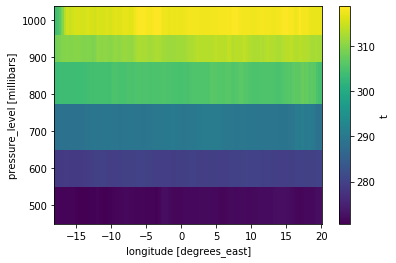

In [17]:
ds.t.max(['time','latitude']).plot()

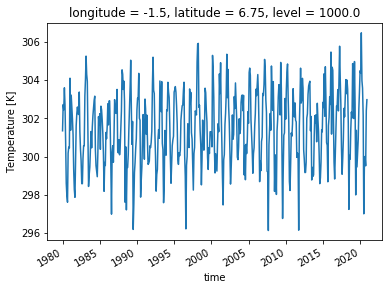

In [18]:
# In conjuction with matplotlib, n-dimensional plots can be made with xarray. Let us plot the timeseries
# of temperature at longitude 1.51 W, latitude 6.66 N and at the surface pressure (1000 mb)

ds.t.sel(longitude=-1.51, latitude=6.66, method='nearest', level=1000).plot()

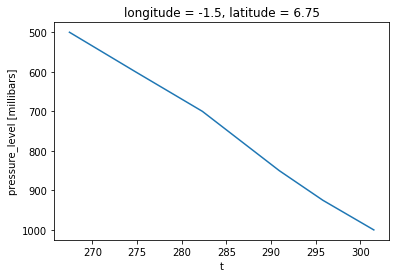

In [19]:
# plot the vertical profile of temperature at longitude 1.51 W, latitude 6.66 N, averaged over time

ds.t.sel(longitude=-1.51, latitude=6.66, method='nearest').mean('time').T.plot(y='level',
                                                                               yincrease=False)

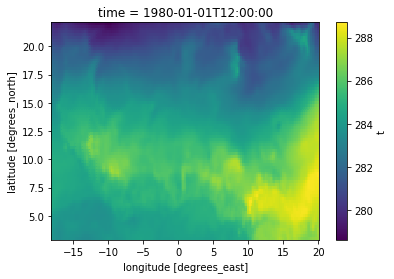

In [20]:
# Plot the temperature at time 1980-01-01T12, averaged over all pressure levels

ds.t.sel(time='1980-01-01T12').mean('level').plot()

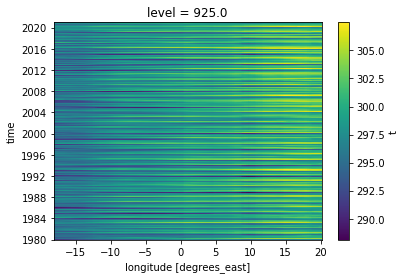

In [21]:
#Plot the temperature at pressure level 1000mb, for all times, averaged over longitudes. This time
#evolution plot is also known as the 'Hovmoller plot'.

ds.t.sel(level=925).mean('latitude').plot()

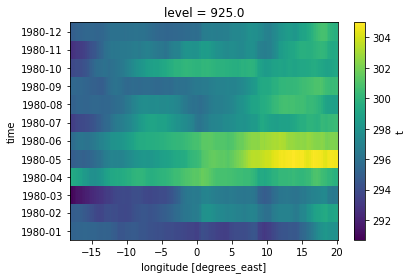

In [22]:
# Plot the hovmoller of temperature from 1980 Jan to 1980 Dec at level 925, averaged over latitudes.

ds.t.sel(time=slice('1980-01-01T12', '1980-12-01T12'),level=925).mean('latitude').plot()

<b>Exercise 1</b>:

1. Compute the sum, maximum and mean of relative humidity over time
2. Compute and plot the difference in relative humidity at the 925mb and 600mb level on (a) 1990-06-01 and (b) 2020-06-01 respectively. What observations can be made from both plots?
3. Plot the time-evolution (Hovmoller) of the relative humidity averaged over all pressure levels and longitudes
4. From Question 3, plot the Hovmoller from between 1990 and 2000. Hint: Use slice to subset
5. From Question 3, plot the Hovmoller for 2020 Jan to Dec relative humidity only.